# Multi-qubit gate challenge

An updated list  of all the gates , both single and multi qubit

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

### Multi Qubit Reference

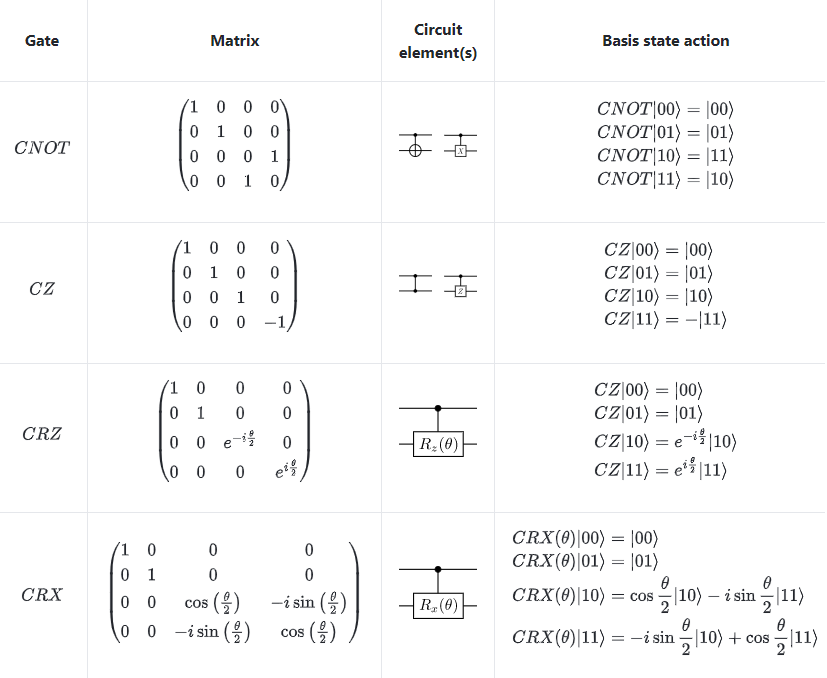

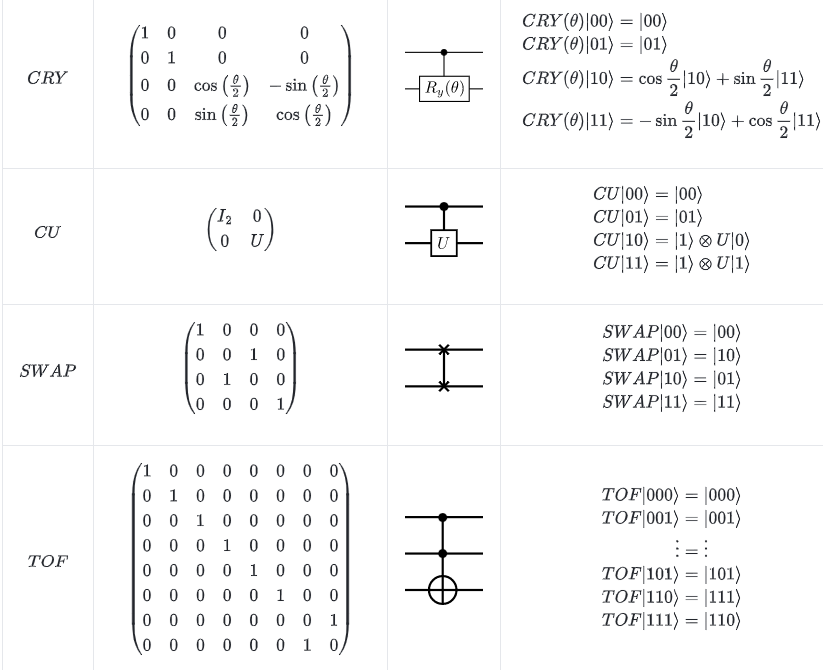

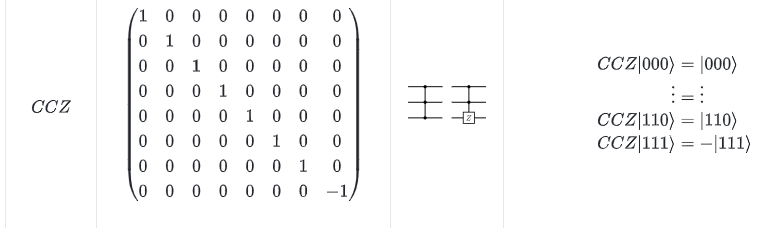

### Codercise I.14.1
Consider again the entangled state that we saw earlier

$$|\psi_+⟩ = \frac{1}{\sqrt{2}} (|00⟩ + |11⟩)$$


This state is called **Bell State** and it has 3 siblings.


-----

The four Bell states are:

$$\frac{1}{\sqrt{2}} \left( \left|00\right\rangle + \left|11\right\rangle \right)$$

$$\frac{1}{\sqrt{2}} \left( \left|00\right\rangle - \left|11\right\rangle \right)$$

$$\frac{1}{\sqrt{2}} \left( \left|01\right\rangle + \left|10\right\rangle \right)$$

$$\frac{1}{\sqrt{2}} \left( \left|01\right\rangle - \left|10\right\rangle \right)$$

where $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$, and $\left|11\right\rangle$ are the four possible states of two qubits.



Together, these states form the Bell basis. Write a set of 4 circuits that prepare and return each of the four Bell states.



In [1]:
%pip install pennylane
import pennylane as qml
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.0 MB/s eta 0:00:00


In [2]:
dev = qml.device('default.qubit', wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.

@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])

    # PREPARE (1/sqrt(2)) (|00> + |11>)

    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    

    # PREPARE (1/sqrt(2)) (|00> - |11>)
    
    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    ##################
    
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    qml.CNOT(wires=[0,1])

    # PREPARE  (1/sqrt(2)) (|01> + |10>)
 
    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    ##################
    # Apply a Hadamard gate on the first qubit
    qml.PauliX(wires=1)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    #
    #qml.PauliZ(wires=0)
    #qml.PauliZ(wires=1)
    qml.CNOT(wires=[0, 1])
    #qml.PauliZ(wires=0)
    # Apply a Pauli-X gate on the second qubit, multiplied by a global phase of -i
    
    

    # PREPARE  (1/sqrt(2)) (|01> - |10>)
    
    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
#print(f"|ψ_+> = {psi_plus}")
#print(f"|ψ_-> = {psi_minus}")
#print(f"|ϕ_+> = {phi_plus}")
#print(f"|ϕ_-> = {phi_minus}")


*Solution* 
The four circuits are 

![](https://codebook.xanadu.ai/pics/bell-circuits.svg)




### Codercise I.14.2

Implement a 3-qubit circuit in PennyLane that can perform the following

<li> If the first two qubits are both $|0⟩$ , do nothing

<li> If the first qubit is $|0⟩$ and the second is $|1⟩$ apply `PauliX` to the third qubit

<li> If the first qubit is $|1⟩$ and the second if $|0⟩$ apply `PauliZ` to the third qubit

<li> If the first two qubits are both $|1⟩$ , apply a `PauliY` operation to the third qubit

-----

The circuit must produce the exact state that would be obtained by applying these operations, i.e., not just up to a global phase.

There is no need to use any if statements in your part of the quantum function; it can all be implemented using quantum operations alone!


-----


Tip. This type of operation is called a **quantum multiplexer**. When all $2^n$ possible cases of  control qubits are implemented, and the target operation is a single-qubit rotation, it is called a uniformly controlled rotation.




In [3]:

dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]

@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1) 

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)
    
    ##################
    # YOUR CODE HERE #
    ##################
    
    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    
    
    ## another version
    qml.PauliX(wires=0)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)
    qml.adjoint(qml.S)(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.S(wires=2)
    
    
    
    return qml.state()
    

print(apply_control_sequence(state))


[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


*Solution*. All of these operations can be expressed as controlled operations, but controlled on different states. Since each operation will "trigger" only on a specific input state, we can apply them one after another in a circuit:


![](https://codebook.xanadu.ai/pics/challenge-exercise.svg)




This is how we transpile it:

![](https://codebook.xanadu.ai/pics/challenge-exercise-unrolled.svg)